In [16]:
import os
import numpy as np

import prepare_data

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 

import seaborn as sns

In [5]:
data_path = os.path.join("statistic_features", "stat_features_60s.csv")
patient_list = ['002','003','005','007','08a','08b','09a','09b', '10a','011','013','014','15a','15b','016',
            '017','018','019','020','021','022','023','025','026','027','028','029','030','031','032',
            '033','034','035','036','037','038','040','042','043','044','045','047','048','049','051']
statistics_list=["std_x", "std_y", "std_z"]

In [57]:
train_patient_list, test_patient_list = train_test_split(patient_list, random_state=152, test_size=0.3)

In [781]:
#prepare_data.save_statistic_features(patient_list, sorce_path="ICHI14_dataset\data", 
#                                         save_path=data_path, window_len=60)

In [58]:
X_train, y_train = prepare_data.load_statistic_features(train_patient_list, 
                                                        data_path=data_path,
                                                        statistics_list=statistics_list)
print(X_train.shape)
print(y_train.shape)

(15850, 3)
(15850,)


In [59]:
X_test, y_test = prepare_data.load_statistic_features(test_patient_list,
                                                          data_path=data_path,
                                                          statistics_list=statistics_list)
print(X_test.shape)
print(y_test.shape)

(7355, 3)
(7355,)


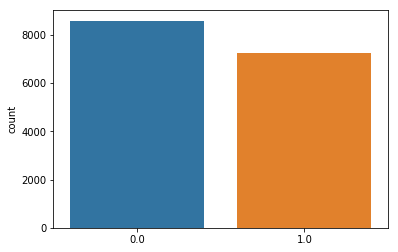

In [12]:
sns.countplot(y_train)

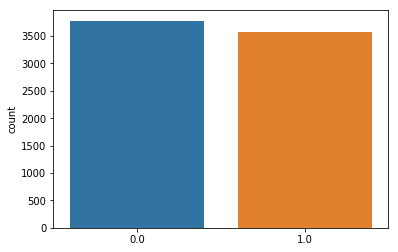

In [13]:
sns.countplot(y_test)

### 1. Lin. Reg, only one window

In [17]:
%%time
model1 = LogisticRegression()
model1.fit(X_train, y_train)

Wall time: 273 ms


In [18]:
y_predict = model1.predict(X_train)

print("\nTrain set result: ")
print(metrics.classification_report(y_train, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train, y_predict))

accuracy = metrics.accuracy_score(y_train, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model1.predict(X_test)

print("\nTrain set result: ")
print(metrics.classification_report(y_test, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test, y_predict))

accuracy = metrics.accuracy_score(y_test, y_predict)
print("\nAccuracy on train set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.64      0.92      0.75      8586
        1.0       0.80      0.38      0.51      7264

avg / total       0.71      0.67      0.64     15850

Confussion matrix: 
 [[7922  664]
 [4531 2733]]

Accuracy on train set:  0.6722397476340694

Train set result: 
             precision    recall  f1-score   support

        0.0       0.62      0.92      0.74      3781
        1.0       0.82      0.41      0.54      3574

avg / total       0.72      0.67      0.64      7355

Confussion matrix: 
 [[3465  316]
 [2119 1455]]

Accuracy on train set:  0.6689326988443236


### 2. Lin. Reg, several windows features for one window

In [60]:
X_train_new, y_train_new = prepare_data.load_stat_features_others_windows(train_patient_list, 
                                                                          data_path=data_path, 
                                                                          n_others_windows=16)
X_test_new, y_test_new = prepare_data.load_stat_features_others_windows(test_patient_list, 
                                                                        data_path=data_path, 
                                                                        n_others_windows=16)


In [61]:
print(X_train_new.shape)
print(y_train_new.shape)

print(X_test_new.shape)
print(y_test_new.shape)

(15354, 51)
(15354,)
(7131, 51)
(7131,)


In [62]:
%%time
model3 = LogisticRegression()
model3.fit(X_train_new, y_train_new)

Wall time: 273 ms


In [63]:
y_predict = model3.predict(X_train_new)

print("\nTrain set result: ")
print(metrics.classification_report(y_train_new, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train_new, y_predict))

accuracy = metrics.accuracy_score(y_train_new, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model3.predict(X_test_new)

print("\nTest set result: ")
print(metrics.classification_report(y_test_new, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test_new, y_predict))

accuracy = metrics.accuracy_score(y_test_new, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.72      0.89      0.79      8586
        1.0       0.79      0.55      0.65      6768

avg / total       0.75      0.74      0.73     15354

Confussion matrix: 
 [[7614  972]
 [3020 3748]]

Accuracy on train set:  0.7400026051843168

Test set result: 
             precision    recall  f1-score   support

        0.0       0.72      0.88      0.80      3773
        1.0       0.83      0.62      0.71      3358

avg / total       0.77      0.76      0.76      7131

Confussion matrix: 
 [[3332  441]
 [1265 2093]]

Accuracy on test set:  0.7607628663581545


In [21]:
%%time
model4 = GradientBoostingClassifier(n_estimators=30, max_depth=4)
model4.fit(X_train_new, y_train_new)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [22]:
y_predict = model4.predict(X_train_new)

print("\nTrain set result: ")
print(metrics.classification_report(y_train_new, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_train_new, y_predict))

accuracy = metrics.accuracy_score(y_train_new, y_predict)
print("\nAccuracy on train set: ", accuracy)

y_predict = model4.predict(X_test_new)

print("\nTest set result: ")
print(metrics.classification_report(y_test_new, y_predict))
print("Confussion matrix: \n", metrics.confusion_matrix(y_test_new, y_predict))

accuracy = metrics.accuracy_score(y_test_new, y_predict)
print("\nAccuracy on test set: ", accuracy)


Train set result: 
             precision    recall  f1-score   support

        0.0       0.73      0.91      0.81      8586
        1.0       0.84      0.57      0.68      6768

avg / total       0.78      0.76      0.75     15354

Confussion matrix: 
 [[7855  731]
 [2911 3857]]

Accuracy on train set:  0.7627979679562329

Test set result: 
             precision    recall  f1-score   support

        0.0       0.71      0.90      0.79      3773
        1.0       0.83      0.58      0.68      3358

avg / total       0.77      0.75      0.74      7131

Confussion matrix: 
 [[3383  390]
 [1408 1950]]

Accuracy on test set:  0.7478614500070117


### 3. RNN

In [21]:
from keras.preprocessing import sequence
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM, Bidirectional, Dropout
from keras.layers import SpatialDropout1D
from keras.models import Sequential

from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [22]:
test_patient_list, valid_patient_list = train_test_split(test_patient_list, random_state=151, test_size=0.5)

In [26]:
X_train_new, y_train_new = prepare_data.load_stat_features_others_windows_rnn(train_patient_list, 
                                                                          data_path=data_path, 
                                                                          n_others_windows=16)

X_test_new, y_test_new = prepare_data.load_stat_features_others_windows_rnn(test_patient_list, 
                                                                        data_path=data_path, 
                                                                        n_others_windows=16)

X_valid_new, y_valid_new = prepare_data.load_stat_features_others_windows_rnn(valid_patient_list, 
                                                                        data_path=data_path, 
                                                                        n_others_windows=16)

In [27]:
print(X_train_new.shape)
print(y_train_new.shape)

print(X_valid_new.shape)
print(y_valid_new.shape)

print(X_test_new.shape)
print(y_test_new.shape)

(15354, 17, 3)
(15354,)
(3595, 17, 3)
(3595,)
(3536, 17, 3)
(3536,)


In [43]:
RNN = Sequential()

RNN.add(LSTM(10, dropout=0.1, recurrent_dropout=0.1, input_shape=(17, 3)))
#RNN.add(Bidirectional(layer=LSTM(10, dropout=0.1, recurrent_dropout=0.1) ,input_shape=(17, 3)))
RNN.add(Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform", kernel_regularizer=l2(0.01)))

RNN.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

print(RNN.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                560       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
callbacks = [ModelCheckpoint('saved_models/RNN2_std_16win_weights.hdf5', monitor='val_acc', save_best_only=True), 
             EarlyStopping(monitor='val_acc', patience=5)]

In [45]:
%%time

RNN.fit(X_train_new, y_train_new,
       batch_size=32, 
       epochs=15, 
       validation_data=(X_valid_new, y_valid_new), 
       callbacks=callbacks,
       verbose=1)

Train on 15354 samples, validate on 3595 samples
Epoch 1/15
15354/15354 [==============================] - 47s 3ms/step - loss: 0.5997 - acc: 0.7043 - val_loss: 0.5328 - val_acc: 0.7555
Epoch 2/15
15354/15354 [==============================] - 27s 2ms/step - loss: 0.5573 - acc: 0.7363 - val_loss: 0.5248 - val_acc: 0.7552
Epoch 3/15
15354/15354 [==============================] - 22s 1ms/step - loss: 0.5519 - acc: 0.7398 - val_loss: 0.5248 - val_acc: 0.7502
Epoch 4/15
15354/15354 [==============================] - 51s 3ms/step - loss: 0.5496 - acc: 0.7380 - val_loss: 0.5205 - val_acc: 0.7561
Epoch 5/15
15354/15354 [==============================] - 20s 1ms/step - loss: 0.5468 - acc: 0.7399 - val_loss: 0.5207 - val_acc: 0.7569
Epoch 6/15
15354/15354 [==============================] - 55s 4ms/step - loss: 0.5458 - acc: 0.7403 - val_loss: 0.5195 - val_acc: 0.7591
Epoch 7/15
15354/15354 [==============================] - 26s 2ms/step - loss: 0.5448 - acc: 0.7421 - val_loss: 0.5185 - val_acc:

In [46]:
scores = RNN.evaluate(X_test_new, y_test_new)
print("Test accuracy =", scores[1])

3536/3536 [==============================] - 3s 748us/step
Test accuracy = 0.7567873303167421


In [47]:
RNN.save_weights("saved_models/RNN2.2_std_16win_weights.hdf5")

### Results of model with best valid acc

In [48]:
RNN.load_weights("saved_models/RNN2_std_16win_weights.hdf5")

In [49]:
scores = RNN.evaluate(X_test_new, y_test_new)
print("Test accuracy =", scores[1])

3536/3536 [==============================] - 2s 689us/step
Test accuracy = 0.7559389140271493


In [50]:
scores = RNN.evaluate(X_valid_new, y_valid_new)
print("Valid accuracy =", scores[1])

3595/3595 [==============================] - 3s 738us/step
Valid accuracy = 0.7624478442280945


In [51]:
scores = RNN.evaluate(X_train_new, y_train_new)
print("Train accuracy =", scores[1])

15354/15354 [==============================] - 12s 754us/step
Train accuracy = 0.74625504757567


#### Results:

simple rnn(10), EarlyStopping = 5, STD-features:

    4 windows: max test acc = 0.7419, <10m

    8 windows: max test acc = 0.75089, 0.7473, 0.7652, val_acc: 0.7291, train_acc: 0.7404, ~24 epoch, <15m,     

    10 windows: max test acc = 0.7471, valid = 0.7548, <10m

    12 windows: max test acc = 0.0.7487, valid = 0.7462, ~15 epoch, <10m
    
    16 windows: test accuracy = 0.7567,  valid accuracy = 0.7552, time = 7 min   - rnn 2.2 

Bidirectional (random states for spliting data ~ 152, 151):

    8 windows: test accuracy = 0.75,  valid accuracy = 0.7466, time = 5min 
    
    16 windows: test accuracy = 0.7508,  valid accuracy = 0.7633, time = 10 min   - rnn 1.2




In [52]:
saved_model = RNN.to_json()
with open("saved_models/RNN2_std_16win.json", "w") as json_file:
    json_file.write(saved_model)